{'x': 10.0, 'y': 3.0, 'z': 3.9}
{'x': 10.0, 'y': 5.7, 'z': 8.219999999999999}
{'x': 10.0, 'y': 8.129999999999999, 'z': 12.837}
{'x': 10.0, 'y': 10.317, 'z': 17.648400000000002}
{'x': 10.0, 'y': 12.285300000000001, 'z': 22.569150000000004}
{'x': 10.0, 'y': 14.056770000000002, 'z': 27.529266000000007}
{'x': 10.0, 'y': 15.651093000000001, 'z': 32.47166730000001}
{'x': 10.0, 'y': 17.0859837, 'z': 37.35029568}
{'x': 10.0, 'y': 18.377385330000003, 'z': 42.128481711}
{'x': 10.0, 'y': 19.539646797000003, 'z': 46.777527579}
{'x': 10.0, 'y': 20.585682117300003, 'z': 51.27547945629}
{'x': 10.0, 'y': 21.527113905570005, 'z': 55.606065682332}
{'x': 10.0, 'y': 22.374402515013006, 'z': 59.75777986860271}
{'x': 10.0, 'y': 23.136962263511705, 'z': 63.72309056079595}
{'x': 10.0, 'y': 23.823266037160536, 'z': 67.49776131586452}
{'x': 10.0, 'y': 24.440939433444484, 'z': 71.08026701431142}
{'x': 10.0, 'y': 24.996845490100036, 'z': 74.47129395991028}
{'x': 10.0, 'y': 25.497160941090034, 'z': 77.673312846246

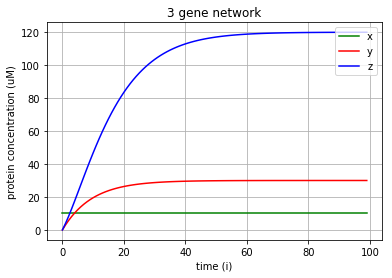

In [20]:
## Computational Foundations of Systems Biology
## Assignment 1 - Question 1
## Yamuna Rajan

import numpy as np
import matplotlib.pyplot as plt
import requests
import json

N = 100                                              # total number of data points
n = np.arange(0, N, 1)                               # [0,..., N-1] (vector)

x = np.empty(N)                                      # protein x concentration in uM (vector)
x.fill(10)                                           # Protein x levels are constant (= 10 uM)

y = np.empty(N)                                      # protein y concentration in uM (vector)
z = np.empty(N)                                      # protein z concentration in uM (vector)

y[0] = 0                                             # initial y protein concentration (= 0 uM)
z[0] = 0                                             # initial z protein concentration (= 0 uM)

Pxy = 0.3                                            # Production parameter Pxy
Pxz = 0.3                                            # Production parameter Pxz
Pyz = 0.3                                            # Production parameter Pyz
Px = 0.9                                             # degradation parameter Px
Py = 0.9                                             # degradation parameter Py
Pz = 0.9                                             # degradation parameter Pz

url = "https://threegenenetwork.azurewebsites.net/api/ThreeGeneNetworkNanoService"

for i in range (1, N):                               # discrete-time index i
    data = {'x':x[i-1], 'y':y[i-1], 'z':z[i-1], 'Pxy':Pxy, 'Pxz':Pxz, 'Pyz':Pyz, 'Px':Px, 'Py':Py, 'Pz':Pz}
    response = requests.post(url, json = data)
    responseJson = response.json()
    y[i] = responseJson['y']
    z[i] = responseJson['z']
    print(responseJson)

plt.plot(n,x,'g',label = 'x')
plt.plot(n,y,'r',label = 'y')
plt.plot(n,z,'b',label = 'z')
plt.xlabel('time (i)')
plt.ylabel('protein concentration (uM)')
plt.legend(loc='upper right')
plt.title('3 gene network')
plt.grid(True)
plt.show()